In [36]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
dataset=pd.read_excel('/content/drive/MyDrive/vid_game_sale.xlsx')

In [38]:
dataset

,Rank,Game Title,Platform,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global,Review
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,40.43,28.39,3.77,8.54,81.12,76.28
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24,91.00
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,14.50,12.22,3.63,3.21,33.55,82.07
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,14.82,10.51,3.18,3.01,31.52,82.65
4,5,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26,88.00
...,...,...,...,...,...,...,...,...,...,...,...,...
1902,1903,Lizzie McGuire 2: Lizzie Diaries,GBA,2004.0,Action,Disney Interactive Studios,0.60,0.22,0.00,0.01,0.83,55.00
1903,1904,Xenoblade Chronicles,Wii,2010.0,Role-Playing,Nintendo,0.39,0.22,0.16,0.07,0.83,91.74
1904,1905,SingStar Abba,PS3,2008.0,Misc,Sony Computer Entertainment,0.25,0.44,0.00,0.14,0.83,73.00
1905,1906,FIFA Soccer World Championship,PS2,2000.0,Sports,Electronic Arts,0.27,0.21,0.28,0.07,0.83,73.00


In [39]:
dataset.isnull().sum()

,0
Rank,0
Game Title,0
Platform,0
Year,29
Genre,0
Publisher,2
North America,0
Europe,0
Japan,0
Rest of World,0


In [40]:
from sklearn.impute import SimpleImputer

In [41]:
num_imputer=SimpleImputer(strategy='mean')
cat_imputer=SimpleImputer(strategy='most_frequent')

In [42]:
dataset['Year']=num_imputer.fit_transform(dataset[['Year']])

In [43]:
dataset['Publisher']=cat_imputer.fit_transform(dataset['Publisher'].values.reshape(-1,1))[:,0]

In [44]:
dataset.isnull().sum()

,0
Rank,0
Game Title,0
Platform,0
Year,0
Genre,0
Publisher,0
North America,0
Europe,0
Japan,0
Rest of World,0


In [45]:
dataset['Year']=dataset['Year'].astype(int)

In [46]:
dataset['Year'].dtypes

dtype('int64')

In [47]:
dataset['Rank'].value_counts()

,count
Rank,
1,1
1268,1
1280,1
1279,1
1278,1
...,...
632,1
631,1
630,1


Text(0.5, 0.98, 'Hist of North America')

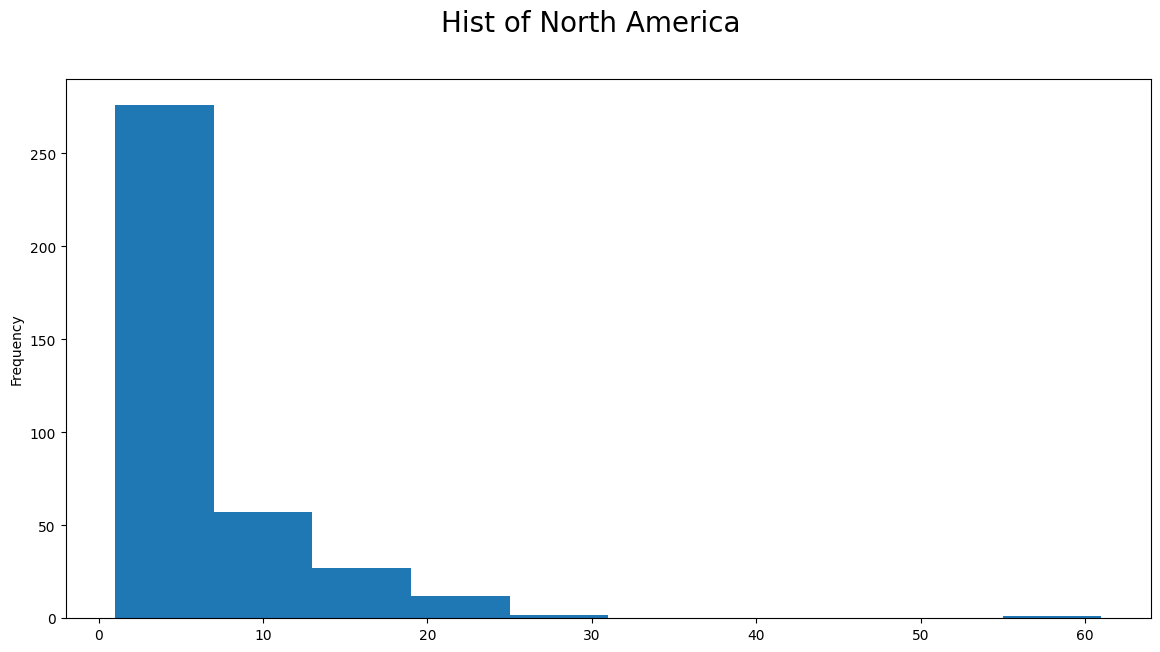

In [48]:
dataset['North America'].value_counts().plot(kind='hist',figsize=(14,7))
plt.suptitle('Hist of North America',fontsize=20)

Text(0.5, 0.98, 'Countplot of Europe')

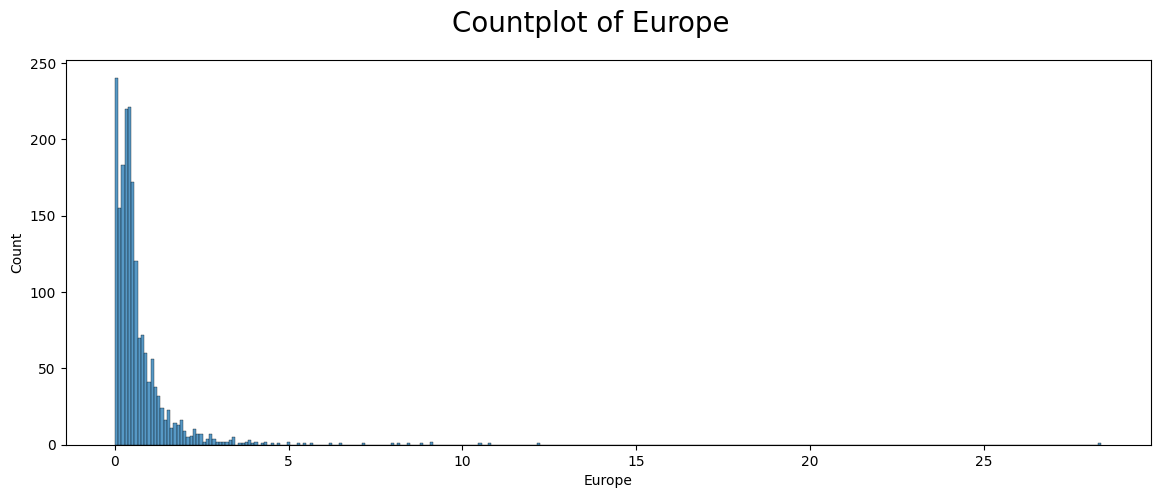

In [49]:
plt.figure(figsize=(14,5))
sns.histplot(dataset,x='Europe')
plt.suptitle('Countplot of Europe',fontsize=20)

Text(0.5, 0.98, 'lineplot of Rank Vs Review')

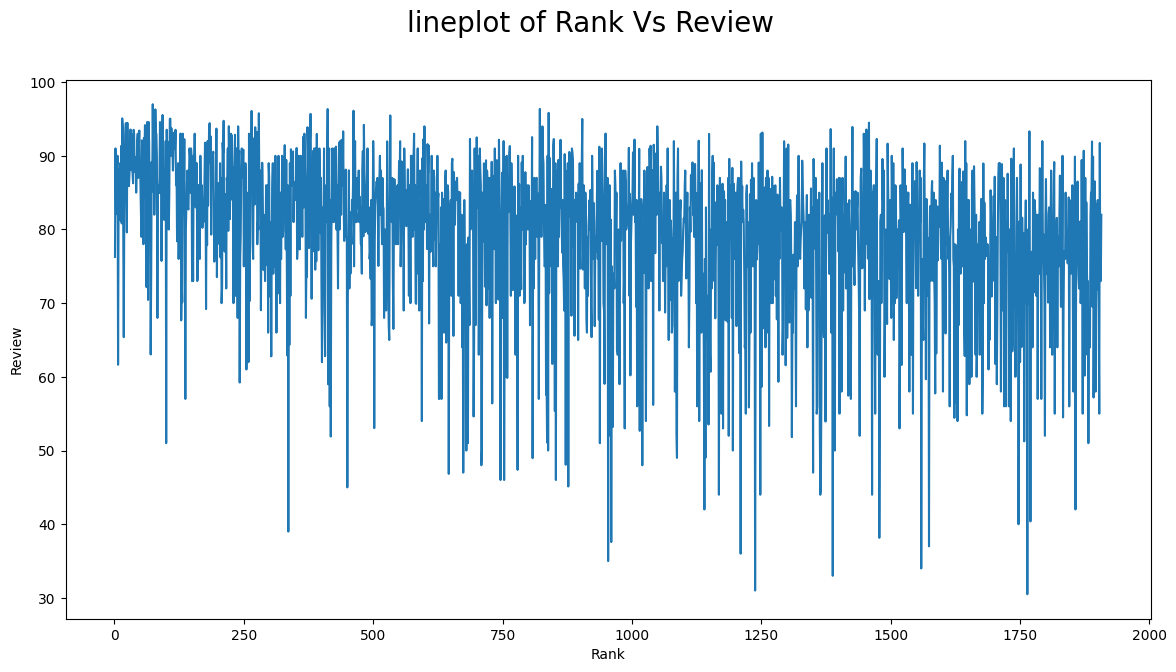

In [50]:
plt.figure(figsize=(14,7))
sns.lineplot(dataset,x='Rank',y='Review')
plt.suptitle('lineplot of Rank Vs Review',fontsize=20)

Text(0.5, 0.98, 'Areaplot of Rank Vs North America')

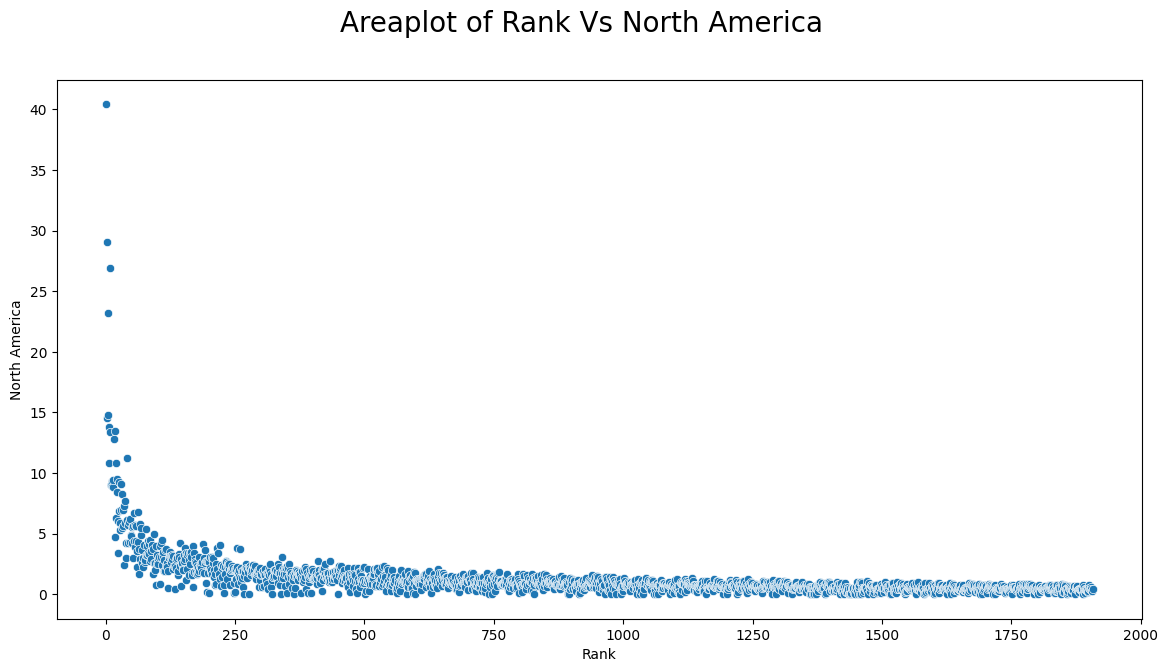

In [51]:
plt.figure(figsize=(14,7))
sns.scatterplot(dataset,x='Rank',y='North America')
plt.suptitle('Areaplot of Rank Vs North America',fontsize=20)

In [52]:
num_data=['Rank','Year','North America','Europe','Japan','Rest of World','Global','Review']

Text(0.5, 0.98, 'Correlation of the dataset')

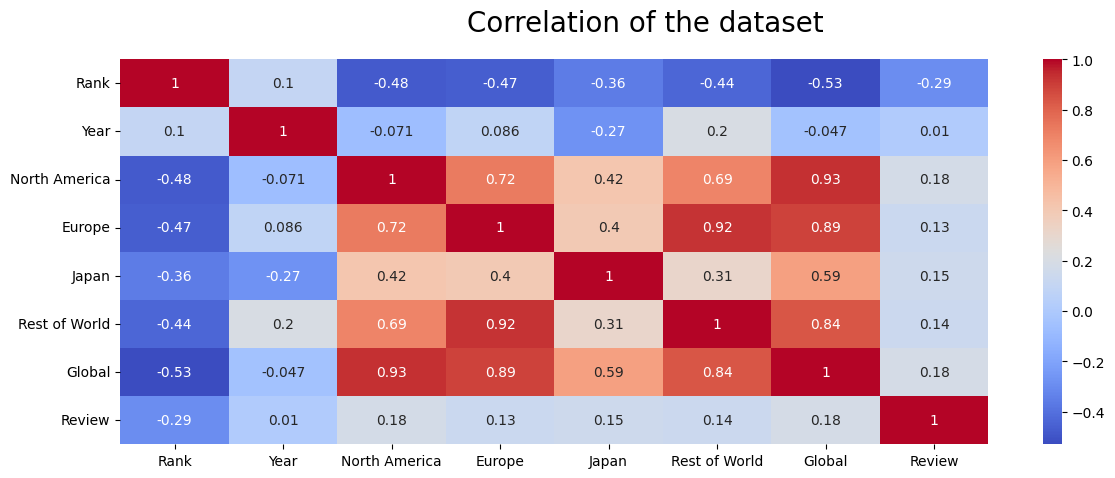

In [53]:
plt.figure(figsize=(14,5))
sns.heatmap(dataset[num_data].corr(),annot=True,cmap='coolwarm')
plt.suptitle('Correlation of the dataset',fontsize=20)

In [54]:
import plotly.express as px


In [55]:
# Group by Genre and sum up the Global sales
genre_sales = dataset.groupby('Genre')['Global'].sum().reset_index()
genre_sales


,Genre,Global
0,Action,637.27
1,Adventure,239.45
2,Fighting,249.00
3,Misc,426.12
4,Platform,595.24
5,Puzzle,108.65
6,Racing,451.80
7,Role-Playing,496.20
8,Shooter,557.20
9,Simulation,205.14


In [56]:
# Create a bar chart showing global sales by Genre
fig = px.bar(genre_sales, x='Genre', y='Global', title='Global Sales by Genre')
fig.show()

In [57]:
# Group by Platform and calculate the average Review score
platform_reviews = dataset.groupby('Platform')['Review'].mean().reset_index()
platform_reviews


,Platform,Review
0,3DS,81.246000
1,DC,91.545000
2,DS,73.234430
3,GB,78.637917
4,GBA,75.041200
5,GC,80.737818
6,GEN,86.090909
7,N64,81.261404
8,NES,76.245000
9,PC,84.619437


In [58]:
# Create a bar chart showing average review scores by Platform
fig = px.bar(platform_reviews, x='Platform', y='Review', title='Average Review Score by Platform')
fig.show()

In [59]:
# Group by Year and sum sales across regions
yearly_region_sales = dataset.groupby('Year')[['North America', 'Europe', 'Japan', 'Rest of World']].sum().reset_index()
yearly_region_sales

,Year,North America,Europe,Japan,Rest of World
0,1983,2.32,0.46,8.10,0.08
1,1984,32.15,1.85,11.00,0.65
2,1985,32.09,4.45,12.13,0.90
3,1986,10.59,2.60,13.58,0.40
4,1987,5.28,1.18,10.42,0.18
5,1988,21.49,6.26,13.55,0.90
6,1989,39.31,7.33,14.85,1.37
7,1990,23.59,7.44,14.04,1.39
8,1991,10.87,3.67,6.25,0.62
9,1992,36.22,12.76,20.65,1.84


In [60]:
# Create a line plot for regional sales by year
fig = px.line(yearly_region_sales, x='Year', y=yearly_region_sales.columns[1:],
              title='Regional Sales by Year')
fig.show()

In [61]:
# Aggregate sales by region
region_sales = dataset[['North America', 'Europe', 'Japan', 'Rest of World']].sum().reset_index()

# Rename columns for readability
region_sales.columns = ['Region', 'Sales']

# For visualization, we will map regions to countries (ISO 3166-1 alpha-3 codes)
region_codes = {
    'North America': 'USA',  # Example: You could aggregate USA, Canada, Mexico into this category
    'Europe': 'EUU',  # Placeholder for Europe; you can split or map specific countries if needed
    'Japan': 'JPN',   # Japan code
    'Rest of World': 'ROW'  # You could specify additional regions or leave this as "Rest of World"
}

# Map the region names to their respective country codes
region_sales['Country_Code'] = region_sales['Region'].map(region_codes)

# Create the choropleth map
fig = px.choropleth(region_sales,
                    locations='Country_Code',
                    color='Sales',
                    hover_name='Region',
                    color_continuous_scale='Viridis',
                    title="Regional Sales in Video Games")

# Show the map
fig.show()

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder


In [63]:
# prompt: write a pytorch source code for LSTM and GRU and fit to this dataset?

import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is already processed as in the provided code
# and stored in a pandas DataFrame called 'dataset'

# Feature Selection (example: select numerical features)
features = ['Rank', 'Year', 'North America', 'Europe', 'Japan', 'Rest of World', 'Review']
target = 'Global'  # Example target variable

X = dataset[features]
y = dataset[target]

# Data scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.values.reshape(-1, 1), dtype=torch.float32)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# LSTM Model
class LSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(LSTMModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.lstm(x)
        out = self.fc(out[:, -1, :])  # Use the last hidden state
        return out

# GRU Model
class GRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRUModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru(x)
        out = self.fc(out[:, -1, :])
        return out


# Hyperparameters
input_size = len(features)
hidden_size = 64
num_layers = 2
output_size = 1
learning_rate = 0.001
num_epochs = 100

# Model instantiation and training (Example with LSTM)
model = LSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Reshape data for LSTM/GRU (add a sequence length dimension of 1)
X_train = X_train.unsqueeze(1)
X_test = X_test.unsqueeze(1)

for epoch in range(num_epochs):
  # Forward pass
  outputs = model(X_train)
  loss = criterion(outputs, y_train)

  # Backward and optimize
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  if (epoch+1) % 10 == 0:
      print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation (example)
with torch.no_grad():
  predicted = model(X_test)
  test_loss = criterion(predicted, y_test)
  print(f'Test Loss: {test_loss.item():.4f}')

# You can repeat the above training and evaluation process for the GRU model.
# Just replace LSTMModel with GRUModel and re-run the training loop.

Epoch [10/100], Loss: 20.4353
Epoch [20/100], Loss: 19.8648
Epoch [30/100], Loss: 18.8501
Epoch [40/100], Loss: 17.1511
Epoch [50/100], Loss: 14.8286
Epoch [60/100], Loss: 12.3752
Epoch [70/100], Loss: 10.4213
Epoch [80/100], Loss: 9.2700
Epoch [90/100], Loss: 8.7233
Epoch [100/100], Loss: 8.3891
Test Loss: 0.8070


In [64]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is already loaded into a pandas DataFrame called 'dataset'
# ... (Your code to load and preprocess the dataset)

# Feature Selection (example: select numerical features)
features = ['Rank', 'Year', 'North America', 'Europe', 'Japan', 'Rest of World', 'Review']
target = 'Global'  # Example target variable

X = dataset[features]
y = dataset[target]

# Data scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.values.reshape(-1, 1), dtype=torch.float32)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dual Layer LSTM and GRU combined model
class DualLayerModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(DualLayerModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)
        self.gru = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True) # Input is LSTM output
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        lstm_out, _ = self.lstm(x)
        gru_out, _ = self.gru(lstm_out)  # Pass LSTM output to GRU
        out = self.fc(gru_out[:, -1, :])
        return out


# Hyperparameters (adjust as needed)
input_size = len(features)
hidden_size = 64  # Example hidden size
num_layers = 2
output_size = 1
learning_rate = 0.001
num_epochs = 100

# Model instantiation
model = DualLayerModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Reshape data for LSTM/GRU (add a sequence length dimension of 1)
# Check if the data is already 3D, if not, reshape it
if X_train.dim() == 2:  # If X_train is 2D (samples x features)
    X_train = X_train.unsqueeze(1)  # Reshape to 3D (samples x sequence_length x features)
if X_test.dim() == 2:
    X_test = X_test.unsqueeze(1)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
with torch.no_grad():
    predicted = model(X_test)
    test_loss = criterion(predicted, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

Epoch [10/100], Loss: 20.5389
Epoch [20/100], Loss: 19.5997
Epoch [30/100], Loss: 17.4304
Epoch [40/100], Loss: 13.0638
Epoch [50/100], Loss: 10.9778
Epoch [60/100], Loss: 9.9672
Epoch [70/100], Loss: 8.9979
Epoch [80/100], Loss: 8.3701
Epoch [90/100], Loss: 7.7843
Epoch [100/100], Loss: 7.2784
Test Loss: 0.2848


In [65]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is already loaded into a pandas DataFrame called 'dataset'
# ... (Your code to load and preprocess the dataset)

# Feature Selection (example: select numerical features)
features = ['Rank', 'Year', 'North America', 'Europe', 'Japan', 'Rest of World', 'Review']
target = 'Global'  # Example target variable

X = dataset[features]
y = dataset[target]

# Data scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.values.reshape(-1, 1), dtype=torch.float32)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Dual Layer GRU model
class DualLayerGRUModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(DualLayerGRUModel, self).__init__()
        self.gru1 = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.gru2 = nn.GRU(hidden_size, hidden_size, num_layers, batch_first=True)  # Input is GRU1 output
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        out, _ = self.gru1(x)
        out, _ = self.gru2(out)  # Pass GRU1 output to GRU2
        out = self.fc(out[:, -1, :])  # Use the last hidden state for prediction
        return out

# Hyperparameters (adjust as needed)
input_size = len(features)
hidden_size = 64  # Example hidden size
num_layers = 2
output_size = 1
learning_rate = 0.001
num_epochs = 100

# Model instantiation
model = DualLayerGRUModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Reshape data for GRU (add a sequence length dimension of 1)
# Check if the data is already 3D, if not, reshape it
if X_train.dim() == 2:  # If X_train is 2D (samples x features)
    X_train = X_train.unsqueeze(1)  # Reshape to 3D (samples x sequence_length x features)
if X_test.dim() == 2:
    X_test = X_test.unsqueeze(1)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
with torch.no_grad():
    predicted = model(X_test)
    test_loss = criterion(predicted, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

Epoch [10/100], Loss: 20.6139
Epoch [20/100], Loss: 19.0889
Epoch [30/100], Loss: 15.2582
Epoch [40/100], Loss: 11.2153
Epoch [50/100], Loss: 10.4876
Epoch [60/100], Loss: 9.5430
Epoch [70/100], Loss: 8.8584
Epoch [80/100], Loss: 8.2720
Epoch [90/100], Loss: 7.7543
Epoch [100/100], Loss: 7.3102
Test Loss: 0.2602


In [66]:
import torch
import torch.nn as nn
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming your dataset is already loaded into a pandas DataFrame called 'dataset'
# ... (Your code to load and preprocess the dataset)

# Feature Selection (example: select numerical features)
features = ['Rank', 'Year', 'North America', 'Europe', 'Japan', 'Rest of World', 'Review']
target = 'Global'  # Example target variable

X = dataset[features]
y = dataset[target]

# Data scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Convert to PyTorch tensors
X = torch.tensor(X, dtype=torch.float32)
y = torch.tensor(y.values.reshape(-1, 1), dtype=torch.float32)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# GRU-LSTM combined model
class GRULSTMModel(nn.Module):
    def __init__(self, input_size, hidden_size, num_layers, output_size):
        super(GRULSTMModel, self).__init__()
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        self.lstm = nn.LSTM(hidden_size, hidden_size, num_layers, batch_first=True)  # Input is GRU output
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Pass through GRU layer
        gru_out, _ = self.gru(x)

        # Pass GRU output to LSTM layer
        lstm_out, _ = self.lstm(gru_out)

        # Use the last hidden state of LSTM for prediction
        out = self.fc(lstm_out[:, -1, :])
        return out

# Hyperparameters (adjust as needed)
input_size = len(features)
hidden_size = 64  # Example hidden size
num_layers = 2
output_size = 1
learning_rate = 0.001
num_epochs = 100

# Model instantiation
model = GRULSTMModel(input_size, hidden_size, num_layers, output_size)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

# Reshape data for GRU/LSTM (add a sequence length dimension of 1)
# Check if the data is already 3D, if not, reshape it
if X_train.dim() == 2:  # If X_train is 2D (samples x features)
    X_train = X_train.unsqueeze(1)  # Reshape to 3D (samples x sequence_length x features)
if X_test.dim() == 2:
    X_test = X_test.unsqueeze(1)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    outputs = model(X_train)
    loss = criterion(outputs, y_train)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Evaluation
with torch.no_grad():
    predicted = model(X_test)
    test_loss = criterion(predicted, y_test)
    print(f'Test Loss: {test_loss.item():.4f}')

Epoch [10/100], Loss: 21.1676
Epoch [20/100], Loss: 20.5664
Epoch [30/100], Loss: 18.9392
Epoch [40/100], Loss: 15.4939
Epoch [50/100], Loss: 12.5188
Epoch [60/100], Loss: 11.6875
Epoch [70/100], Loss: 10.9455
Epoch [80/100], Loss: 10.1837
Epoch [90/100], Loss: 9.5728
Epoch [100/100], Loss: 9.0266
Test Loss: 0.7220
